<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_EnergiaElectricaResidencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consumo de electricidad.** Indicador nº 15 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos del consumo de electricidad por codigo Postal, sector economico y tramo horario de Barcelona facilitados por Datadis. La plataforma de dades de consum elèctric a traves del portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/es/dataset/consum-electricitat-bcn). Los datos del consumo de electricidad vienen informados en MWh

## Carga del conjunto de datos


Cargamos en un dataframe los csv obtenidos desde el año 2019 hasta 2024 sobre el consumo de electricidad en la ciudad de Barcelona por codigo postal

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import viridis
import warnings

In [2]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Energia/Indicador_15_EnergiaElectricaResidencial'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Any,Data,Codi_Postal,Sector_Economic,Tram_Horari,Valor
0,2023,2023-01-01,8001,Indústria,De 00:00:00 a 05:59:59 h,644
1,2023,2023-01-01,8001,Indústria,De 06:00:00 a 11:59:59 h,702
2,2023,2023-01-01,8001,Indústria,De 12:00:00 a 17:59:59 h,783
3,2023,2023-01-01,8001,Indústria,De 18:00:00 a 23:59:59 h,768
4,2023,2023-01-01,8001,Indústria,No consta,57


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226320 entries, 0 to 1226319
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Any              1226320 non-null  int64 
 1   Data             1226320 non-null  object
 2   Codi_Postal      1226320 non-null  int64 
 3   Sector_Economic  1226320 non-null  object
 4   Tram_Horari      1226320 non-null  object
 5   Valor            1226320 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 56.1+ MB


El dataset se compone de un total de 9 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Data:** Fecha en el que se recogieron los datos
*   **Codi_Postal:** Codigo Postal de Barcelona
*   **Sector_Economic:** Nombre del sector economico correspondiente al consumo electrico
*   **Tram_Horari:** Tramo horario correspondiente al consumo electrico
*   **Valor:** Consumo electrico

El dataset tiene un total de 1245800 filas y missing-values


In [6]:
# Analizamos las variables numericas
df_final.describe()

,Any,Codi_Postal,Valor
count,1.226320e+06,1.226320e+06,1.226320e+06
mean,2.020998e+03,8.021190e+03,2.572095e+04
std,1.411101e+00,1.202569e+01,3.272912e+04
min,2.019000e+03,8.001000e+03,0.000000e+00
25%,2.020000e+03,8.011000e+03,3.840000e+02
50%,2.021000e+03,8.021000e+03,1.298100e+04
75%,2.022000e+03,8.031000e+03,4.172700e+04
max,2.023000e+03,8.042000e+03,8.915160e+05


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos.
*   **Valor:** es integra y contiene la información correcta.


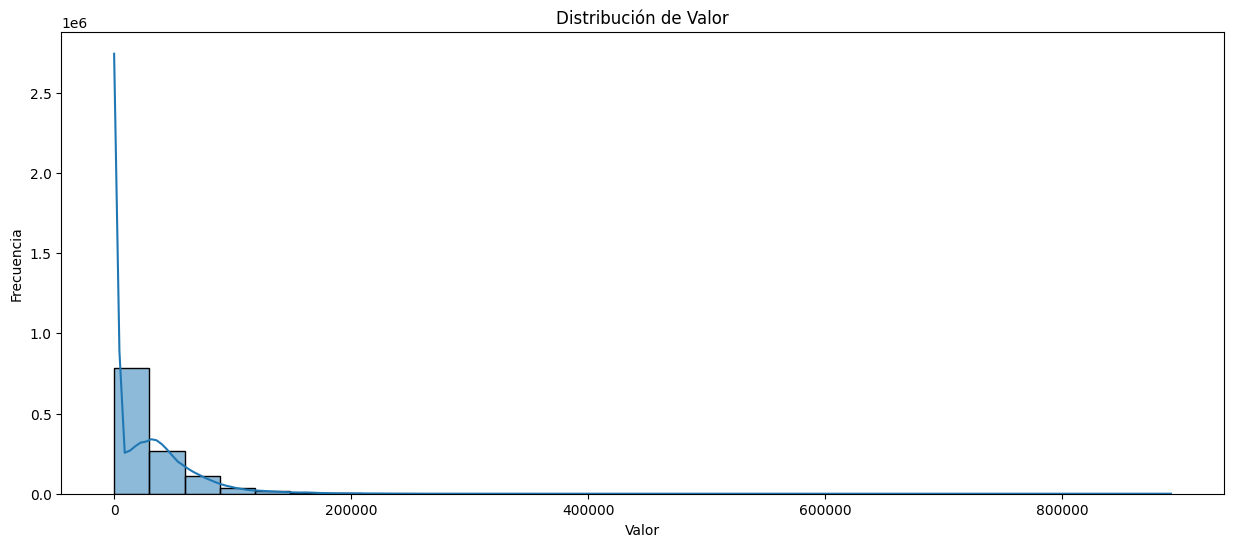

In [7]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(15, 6))
sns.histplot(df_final['Valor'], bins=30, kde=True)
plt.title('Distribución de Valor')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

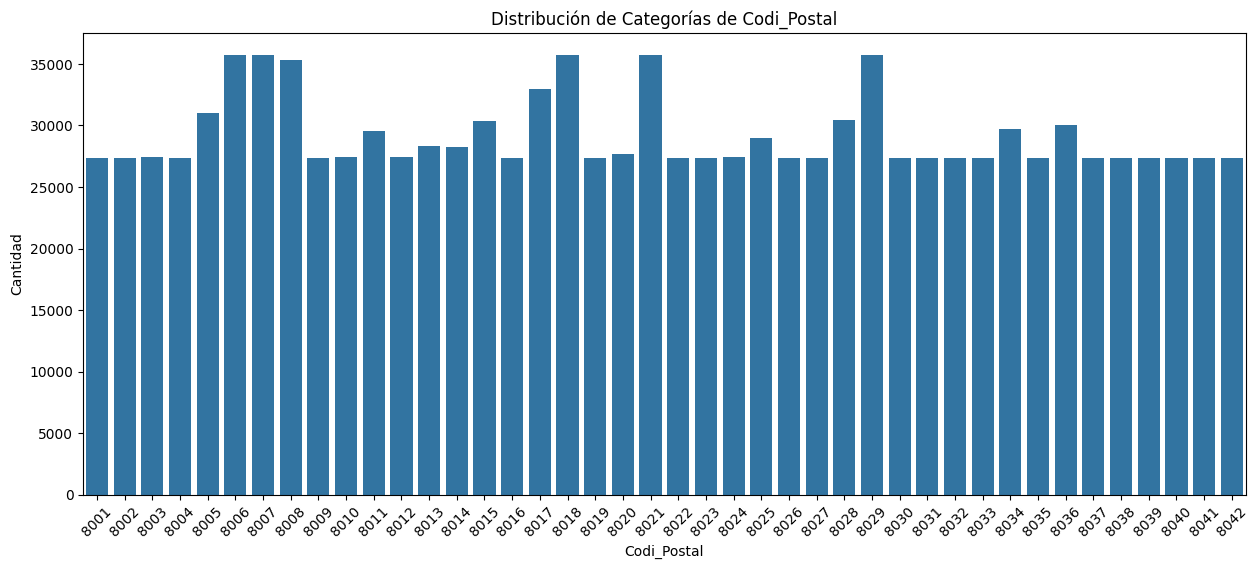

In [8]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Codi_Postal', data=df_final)
plt.title('Distribución de Categorías de Codi_Postal')
plt.xlabel('Codi_Postal')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Barcelona consta de 42 codigos postales.

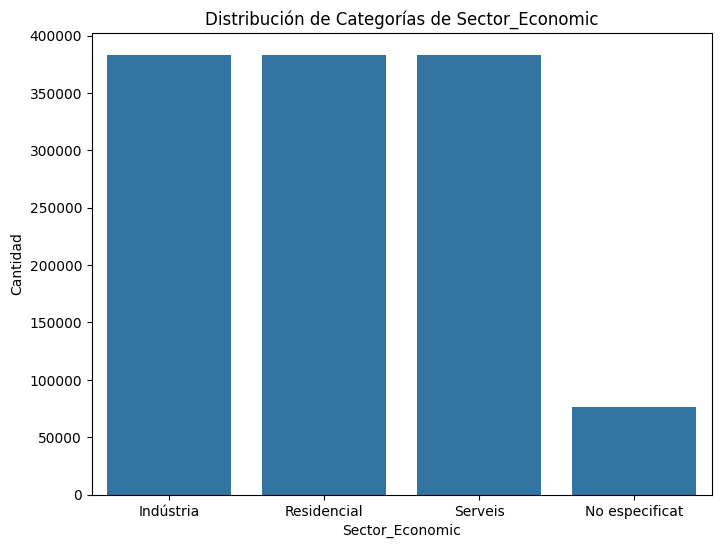

In [9]:
# Visualizamos la distribución de una variable Demanda_ocupacio categórica utilizando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Sector_Economic', data=df_final)
plt.title('Distribución de Categorías de Sector_Economic')
plt.xlabel('Sector_Economic')
plt.ylabel('Cantidad')
plt.show()

El dataset tiene una variable categorica que engloba 4 medidas:
*   Industria
*   Residencia
*   Serveis
*   No especificat

## Limpieza de datos

Verificamos que si hay datos faltantes

In [10]:
df_final.isnull().sum()

Any                0
Data               0
Codi_Postal        0
Sector_Economic    0
Tram_Horari        0
Valor              0
dtype: int64

Observamos que no hay datos faltantes propiamente dichos, pero aun asi debemos centrarnos en las siguientes problematicas que estan directamente ligadas con la limpieza de datos:

1.   Eliminar de la variable de Sector_Economic, la categoria "No especificat"
2.   Aislar en 3 variables distintas la variable continua "Valor", para industria, Residencia y Serveis
3.   Desglosar el campo "data" y obtener mes y dia
4.   Incorporar los datos de distrito y barrio


### Eliminar de la varibale Sector_Economic, la categoria "No especificat"

In [11]:
# Ahondamos en los distritos mirando el codigo y el nombre del distrito, obteniendo un dataset unicamente con estas dos columnas
sectorsEconomics = df_final[['Sector_Economic']]

# Agrupamos por codigo y nombre de distrito
sectorsEconomicsAgrup=sectorsEconomics.groupby(['Sector_Economic'])

# Realizamos un conteo de cada codigo de distrito
sectorsEconomicsAgrup=sectorsEconomicsAgrup['Sector_Economic'].count()

print(sectorsEconomicsAgrup)

Sector_Economic
Indústria         383000
No especificat     76400
Residencial       383460
Serveis           383460
Name: Sector_Economic, dtype: int64


In [12]:
# Filtramos el dataset datos, para quedarnos con todas aquellas filas que tienen un Codi_Districte diferente a 99
datosFiltrados = df_final[df_final['Sector_Economic']!='No especificat']

In [13]:
datosFiltrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149920 entries, 0 to 1226319
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Any              1149920 non-null  int64 
 1   Data             1149920 non-null  object
 2   Codi_Postal      1149920 non-null  int64 
 3   Sector_Economic  1149920 non-null  object
 4   Tram_Horari      1149920 non-null  object
 5   Valor            1149920 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 61.4+ MB


Despues de estos primeros pasos, hemos pasado de un dataframe de 1245800 filas a 1169400

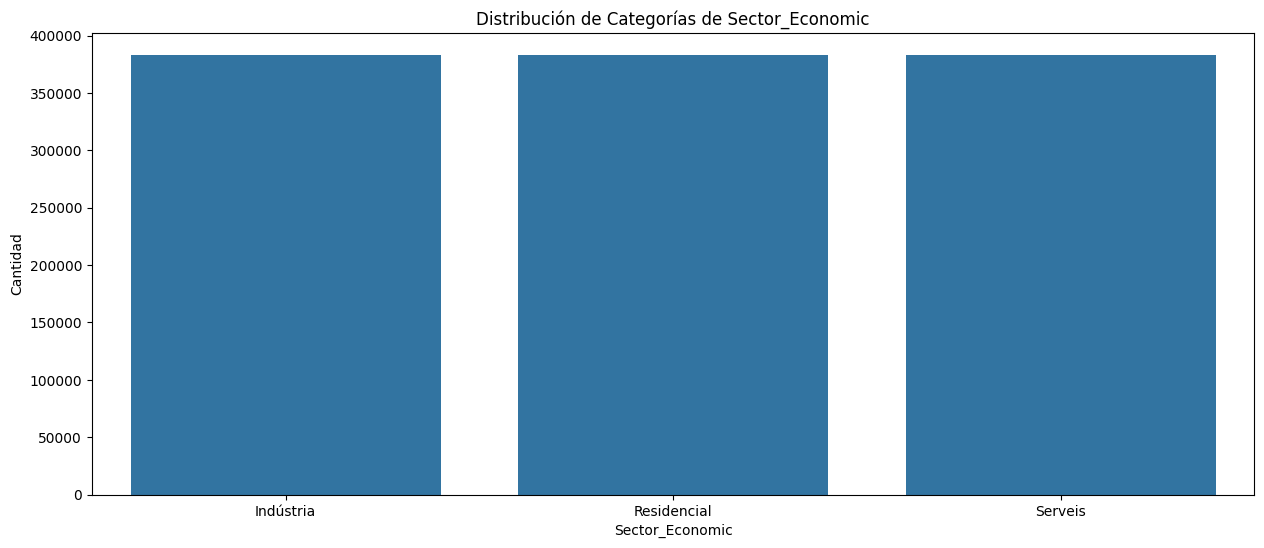

In [14]:
# Visualizamos la distribución de la variable categórica Sector_Economic utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Sector_Economic', data=datosFiltrados)
plt.title('Distribución de Categorías de Sector_Economic')
plt.xlabel('Sector_Economic')
plt.ylabel('Cantidad')
plt.show()

### Filtrar los datos por Sector Economico =  Residencial

In [15]:
# Filtrar el dataFrame por Residencial
df_residencial = datosFiltrados[(datosFiltrados['Sector_Economic'] == "Residencial")]

# Modificamos nombre de la variable valor
df_residencial = df_residencial.rename(columns={'Valor': 'ConsumResidencial'})

# Modificamos nombre de la variable valor
df_residencial = df_residencial.drop(columns=['Sector_Economic'])

df_residencial.head()

,Any,Data,Codi_Postal,Tram_Horari,ConsumResidencial
5,2023,2023-01-01,8001,De 00:00:00 a 05:59:59 h,21672
6,2023,2023-01-01,8001,De 06:00:00 a 11:59:59 h,22619
7,2023,2023-01-01,8001,De 12:00:00 a 17:59:59 h,34533
8,2023,2023-01-01,8001,De 18:00:00 a 23:59:59 h,36591
9,2023,2023-01-01,8001,No consta,4932


In [16]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383460 entries, 5 to 1226314
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Any                383460 non-null  int64 
 1   Data               383460 non-null  object
 2   Codi_Postal        383460 non-null  int64 
 3   Tram_Horari        383460 non-null  object
 4   ConsumResidencial  383460 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 17.6+ MB


### Desglosar el campo "data" y obtener mes y dia

Para poder unir luego los diferentes datasets, es conveniente desglosar el campo de "data" para obtener el mes y dia en variables independientes.


In [17]:
# Convertimos el campo Data a datetime
df_residencial['Data'] = pd.to_datetime(df_residencial['Data'])

#buscamos valores nulos en el campo "Data"
df_residencial.isnull().sum()

Any                  0
Data                 0
Codi_Postal          0
Tram_Horari          0
ConsumResidencial    0
dtype: int64

In [18]:
# Creamos una variable Mes con el valor del mes
df_residencial['Mes']=df_residencial['Data'].dt.month
df_residencial['Mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [19]:
# Creamos una variable Dia con el valor del dia
df_residencial['Dia']=df_residencial['Data'].dt.day
df_residencial['Dia'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

In [20]:
# Agrupamos los datos por Any, Mes, Codi_Districte, Nom_Districte, Codi_Barri y Nom_Barri
df_residencial.head()

,Any,Data,Codi_Postal,Tram_Horari,ConsumResidencial,Mes,Dia
5,2023,2023-01-01,8001,De 00:00:00 a 05:59:59 h,21672,1,1
6,2023,2023-01-01,8001,De 06:00:00 a 11:59:59 h,22619,1,1
7,2023,2023-01-01,8001,De 12:00:00 a 17:59:59 h,34533,1,1
8,2023,2023-01-01,8001,De 18:00:00 a 23:59:59 h,36591,1,1
9,2023,2023-01-01,8001,No consta,4932,1,1


In [21]:
df_filtrado=df_residencial.drop('Data',axis=1)

### Incorporar los datos de distrito y barrio

Dado que el dataset original no incorpora los datos de Distrito y Barrio, agregamos un dataset de cruce para obtener estos datos para cada codigo postal

In [22]:
# Agregamos un conjunto de datos de cruce entre codigos postales y ditritos y barrios
df_carrer = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/0501040100_Adreces/TAULA_DIRELE.csv')

In [23]:
df_carrer.head()

,CODI_CARRER,NUMPOST,LLEPOST,TIPUSNUM,DTE,DIST_POST,SECC_EST,SECC_CENS,BARRI,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LATITUD,LONGITUD
0,102,1,NaN,1,5,17,182.0,3,22,425047.660,4585191.766,424955.778,4584990.804,41.412966,2.102072
1,102,2,NaN,2,5,17,182.0,3,22,425067.593,4585184.500,424975.711,4584983.538,41.412902,2.102311
2,102,3,NaN,1,5,17,182.0,3,22,425047.660,4585191.766,424955.778,4584990.804,41.412966,2.102072
3,102,4,NaN,2,5,17,182.0,3,22,425055.086,4585196.170,424963.204,4584995.208,41.413006,2.102160
4,102,5,NaN,1,5,17,182.0,3,22,425021.124,4585211.831,424929.242,4585010.869,41.413144,2.101752


In [24]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_carrer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171406 entries, 0 to 171405
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CODI_CARRER     171406 non-null  int64  
 1   NUMPOST         171406 non-null  int64  
 2   LLEPOST         8790 non-null    object 
 3   TIPUSNUM        171406 non-null  int64  
 4   DTE             171406 non-null  int64  
 5   DIST_POST       171406 non-null  int64  
 6   SECC_EST        171381 non-null  float64
 7   SECC_CENS       171406 non-null  int64  
 8   BARRI           171406 non-null  int64  
 9   ED50_COORD_X    171406 non-null  float64
 10  ED50_COORD_Y    171406 non-null  float64
 11  ETRS89_COORD_X  171406 non-null  float64
 12  ETRS89_COORD_Y  171406 non-null  float64
 13  LATITUD         171406 non-null  float64
 14  LONGITUD        171406 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 19.6+ MB


In [25]:
# Convertimos el tipo de valor de la variable DIST_POST a entero
df_carrer['DIST_POST'] = df_carrer['DIST_POST'].astype(int)

In [26]:
df_carrer = df_carrer.drop_duplicates(subset=['DTE', 'DIST_POST','BARRI'])

In [27]:
df_carrer.head()

,CODI_CARRER,NUMPOST,LLEPOST,TIPUSNUM,DTE,DIST_POST,SECC_EST,SECC_CENS,BARRI,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LATITUD,LONGITUD
0,102,1,NaN,1,5,17,182.0,3,22,425047.660,4585191.766,424955.778,4584990.804,41.412966,2.102072
22,180,2,NaN,2,3,40,61.0,25,12,427678.912,4575486.518,427587.003,4575285.646,41.325796,2.134711
125,306,1,NaN,1,9,30,81.0,47,60,432342.835,4587251.950,432250.886,4587050.967,41.432169,2.189120
209,408,1,NaN,1,5,17,162.0,12,23,426959.251,4583384.766,426867.351,4583183.821,41.396867,2.125160
232,500,1,NaN,1,1,1,102.0,4,1,430640.047,4580967.402,430548.112,4580766.478,41.375421,2.169463


In [28]:
df_carrer['BARRI'].unique()

array([22, 12, 60, 23,  1, 21,  4, 33, 31, 47, 62, 65, 59, 20, 28, 25, 26,
        2, 27, 35, 69, 71, 72, 39, 36, 37, 55, 15, 19, 53, 43, 67, 66, 70,
       11, 34, 30,  3, 50, 18, 45, 10, 29, 32, 44,  7,  5, 24, 51, 17, 57,
       16, 68, 63, 48, 13, 49, 54, 64, 42, 14, 73, 46, 40, 52, 38, 61,  9,
        8,  6, 56, 58, 41])

In [29]:
# Creamos una nueva columna con los dist_post, que corresponden a los dos ultimos digitos del cogigo postal
df_filtrado['DIST_POST']= df_filtrado['Codi_Postal'].astype(str).apply(lambda x: x[-2:])

In [30]:
# Convertimos el tipo de valor de la variable DIST_POST a entero
df_filtrado['DIST_POST'] = df_filtrado['DIST_POST'].astype(int)

In [31]:
# Unimos los dos dataframes para obtener el codigo de distrito y de barrio en el dataset principal.
df_filtradoDis = pd.merge(df_filtrado, df_carrer[['DIST_POST','DTE','BARRI']], on='DIST_POST', how='left')

In [33]:
# Reordenamos
df_filtradoDis = df_filtradoDis[['Any','Mes','Dia','Tram_Horari','DTE','BARRI','Codi_Postal','ConsumResidencial']]

In [34]:
df_filtradoDis.head()

,Any,Mes,Dia,Tram_Horari,DTE,BARRI,Codi_Postal,ConsumResidencial
0,2023,1,1,De 00:00:00 a 05:59:59 h,1,1,8001,21672
1,2023,1,1,De 00:00:00 a 05:59:59 h,2,7,8001,21672
2,2023,1,1,De 06:00:00 a 11:59:59 h,1,1,8001,22619
3,2023,1,1,De 06:00:00 a 11:59:59 h,2,7,8001,22619
4,2023,1,1,De 12:00:00 a 17:59:59 h,1,1,8001,34533


In [36]:
# Agrupamos los datos por Any, Codi_Districte, Nom_Districte, Codi_Barri y Nom_Barri
df_Agrupado = df_filtradoDis.groupby(['Any','Mes','DTE','BARRI','Codi_Postal'])


# Sumamos las variables continuas ConsumIndustria, ConsumResidencial y ConsumServeis
df_Agrupado=df_Agrupado[['ConsumResidencial']].sum()

print("Primeras filas del DataFrame:")
df_Agrupado.head()

Primeras filas del DataFrame:


ConsumResidencial
Any  Mes DTE BARRI Codi_Postal                   
2019 1   1   1     8001                   5547299
                   8002                   4535282
                   8007                   3115277
                   8038                   4812237
                   8039                    818276

In [37]:
# Reseteamos indices sobre el dataframe agrupado
df_Agrupado = df_Agrupado.reset_index()

In [38]:
df_Agrupado.head()

,Any,Mes,DTE,BARRI,Codi_Postal,ConsumResidencial
0,2019,1,1,1,8001,5547299
1,2019,1,1,1,8002,4535282
2,2019,1,1,1,8007,3115277
3,2019,1,1,1,8038,4812237
4,2019,1,1,1,8039,818276


In [39]:
#Modificamos el nombre de columnas
df_Agrupado=df_Agrupado.rename(columns={'DTE': 'Codi_Districte'})
df_Agrupado=df_Agrupado.rename(columns={'BARRI': 'Codi_Barri'})

In [40]:
# Agregamos un conjunto de datos de cruce entre codigos postales y ditritos y barrios
df_barris = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BarcelonaCiutat_Barris.csv')

In [41]:
df_barris=df_barris.rename(columns={'codi_districte': 'Codi_Districte'})
df_barris=df_barris.rename(columns={'nom_districte': 'Nom_Districte'})
df_barris=df_barris.rename(columns={'codi_barri': 'Codi_Barri'})
df_barris=df_barris.rename(columns={'nom_barri': 'Nom_Barri'})

In [42]:
df_barris.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,geometria_etrs89,geometria_wgs84
0,1,Ciutat Vella,1,el Raval,"POLYGON ((430164.372950341 4581940.39758424, 4...","POLYGON ((2.16473952857229 41.3859611263672, 2..."
1,1,Ciutat Vella,2,el Barri Gòtic,"POLYGON ((431192.082442968 4581854.86907373, 4...","POLYGON ((2.17703981017875 41.3852793578426, 2..."
2,1,Ciutat Vella,3,la Barceloneta,"POLYGON ((432800.888667699 4582084.69046333, 4...","POLYGON ((2.1962542114702 41.3874852975771, 2...."
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera","POLYGON ((431735.899600634 4582445.23444175, 4...","POLYGON ((2.18347683856251 41.390642940051, 2...."
4,2,Eixample,5,el Fort Pienc,"POLYGON ((431743.977580732 4582629.06573617, 4...","POLYGON ((2.18355273505655 41.3922993404645, 2..."


In [43]:
distritos_dfn = df_barris[['Codi_Districte', 'Nom_Districte']]
distritos_df = distritos_dfn.drop_duplicates(subset=['Codi_Districte', 'Nom_Districte'])
distritos_df.head()

,Codi_Districte,Nom_Districte
0,1,Ciutat Vella
4,2,Eixample
10,3,Sants-Montjuïc
18,4,Les Corts
21,5,Sarrià-Sant Gervasi


In [44]:
barris_df = df_barris[['Codi_Barri', 'Nom_Barri']]
barris_df = barris_df.drop_duplicates(subset=['Codi_Barri', 'Nom_Barri'])
barris_df.head()

,Codi_Barri,Nom_Barri
0,1,el Raval
1,2,el Barri Gòtic
2,3,la Barceloneta
3,4,"Sant Pere, Santa Caterina i la Ribera"
4,5,el Fort Pienc


In [45]:
# Unimos los dos dataframes para obtener el codigo de distrito y de barrio en el dataset principal.
df_AgrupadoCom = pd.merge(df_Agrupado, distritos_df, on=['Codi_Districte'], how='left')
df_AgrupadoCom = pd.merge(df_AgrupadoCom, barris_df, on=['Codi_Barri'], how='left')

In [46]:
df_AgrupadoCom.head()

,Any,Mes,Codi_Districte,Codi_Barri,Codi_Postal,ConsumResidencial,Nom_Districte,Nom_Barri
0,2019,1,1,1,8001,5547299,Ciutat Vella,el Raval
1,2019,1,1,1,8002,4535282,Ciutat Vella,el Raval
2,2019,1,1,1,8007,3115277,Ciutat Vella,el Raval
3,2019,1,1,1,8038,4812237,Ciutat Vella,el Raval
4,2019,1,1,1,8039,818276,Ciutat Vella,el Raval


In [47]:
# Reordenamos
df_AgrupadoCom = df_AgrupadoCom[['Any','Mes','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','Codi_Postal','ConsumResidencial']]

## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [48]:
# Guardar el DataFrame en un archivo CSV
df_AgrupadoCom.to_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/datos_15_Energia.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua consumo energia Residencial (ConsumResidencial)

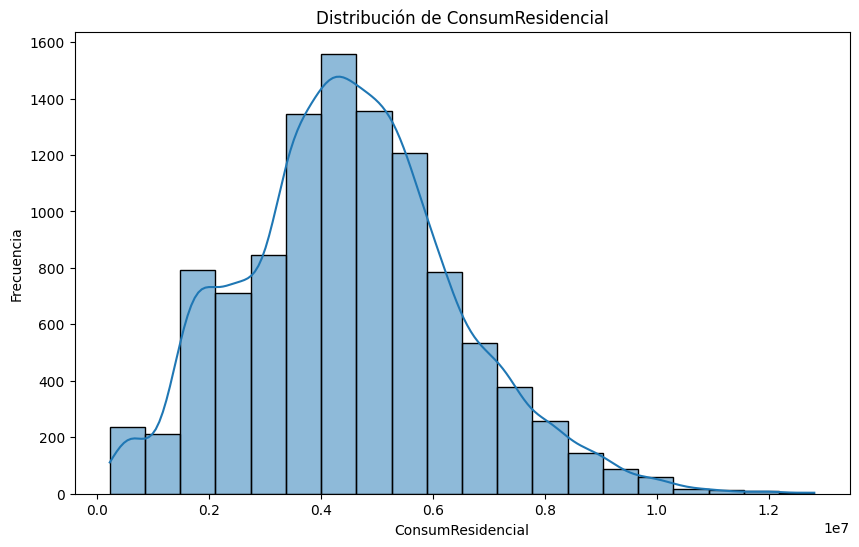

In [49]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_AgrupadoCom['ConsumResidencial'], bins=20, kde=True)
plt.title('Distribución de ConsumResidencial')
plt.xlabel('ConsumResidencial')
plt.ylabel('Frecuencia')
plt.show()

In [50]:
# Agrupamos la variable continua ParadosReg en función de los años
df_ConResidencial = df_AgrupadoCom.groupby(['Any','Codi_Districte','Nom_Districte'])['ConsumResidencial'].sum().reset_index()

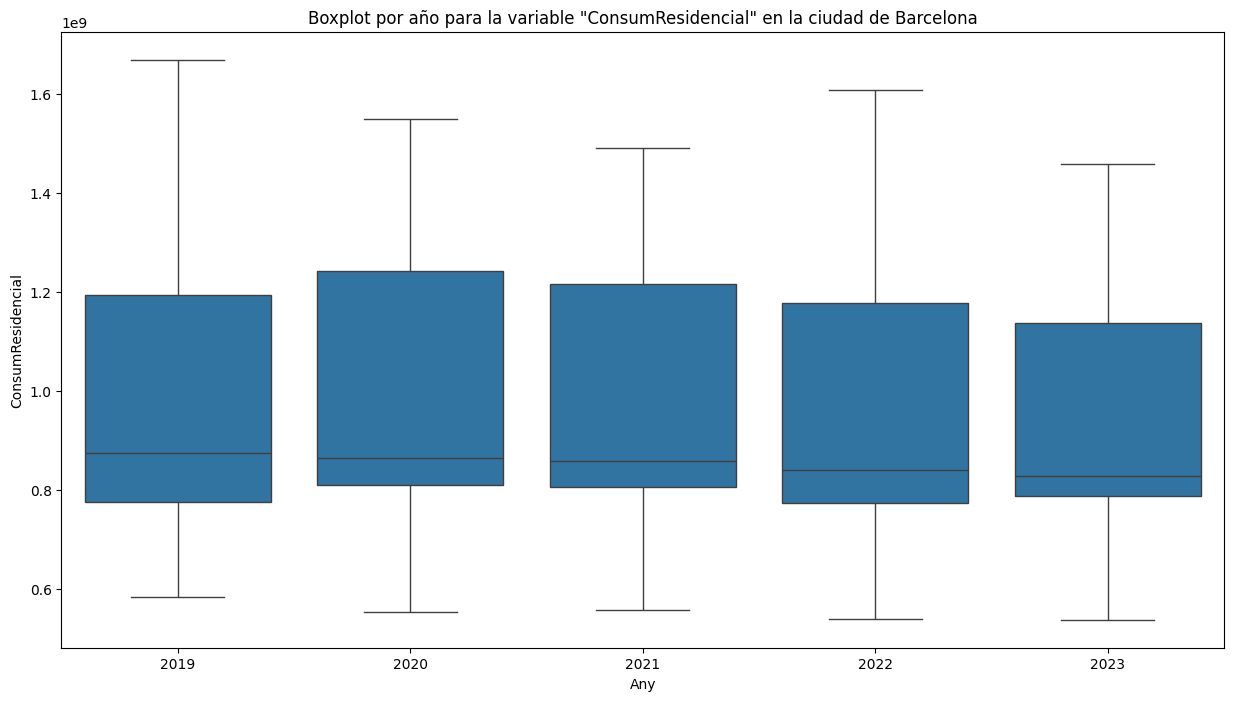

In [51]:
# Crear diagrama de caja para la variable continua NoParados en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='ConsumResidencial', data=df_ConResidencial)
plt.title('Boxplot por año para la variable "ConsumResidencial" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

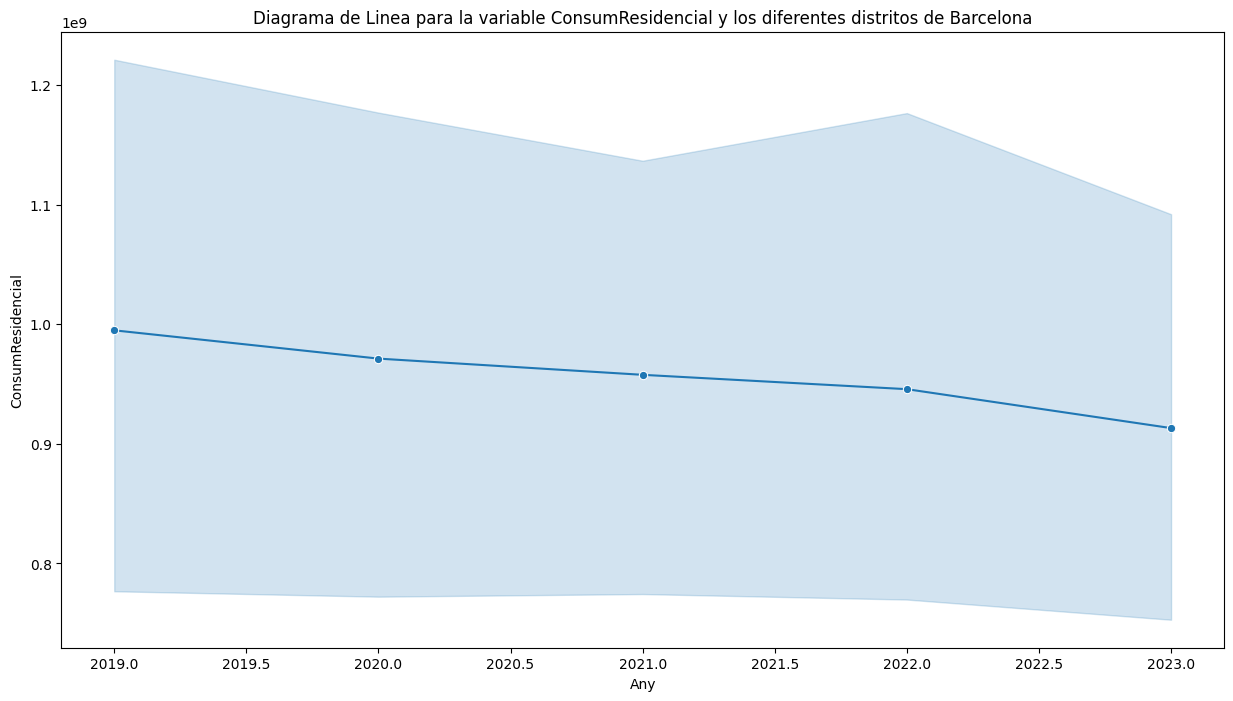

In [52]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_ConResidencial, x='Any', y='ConsumResidencial', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable ConsumResidencial y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('ConsumResidencial')

plt.show()

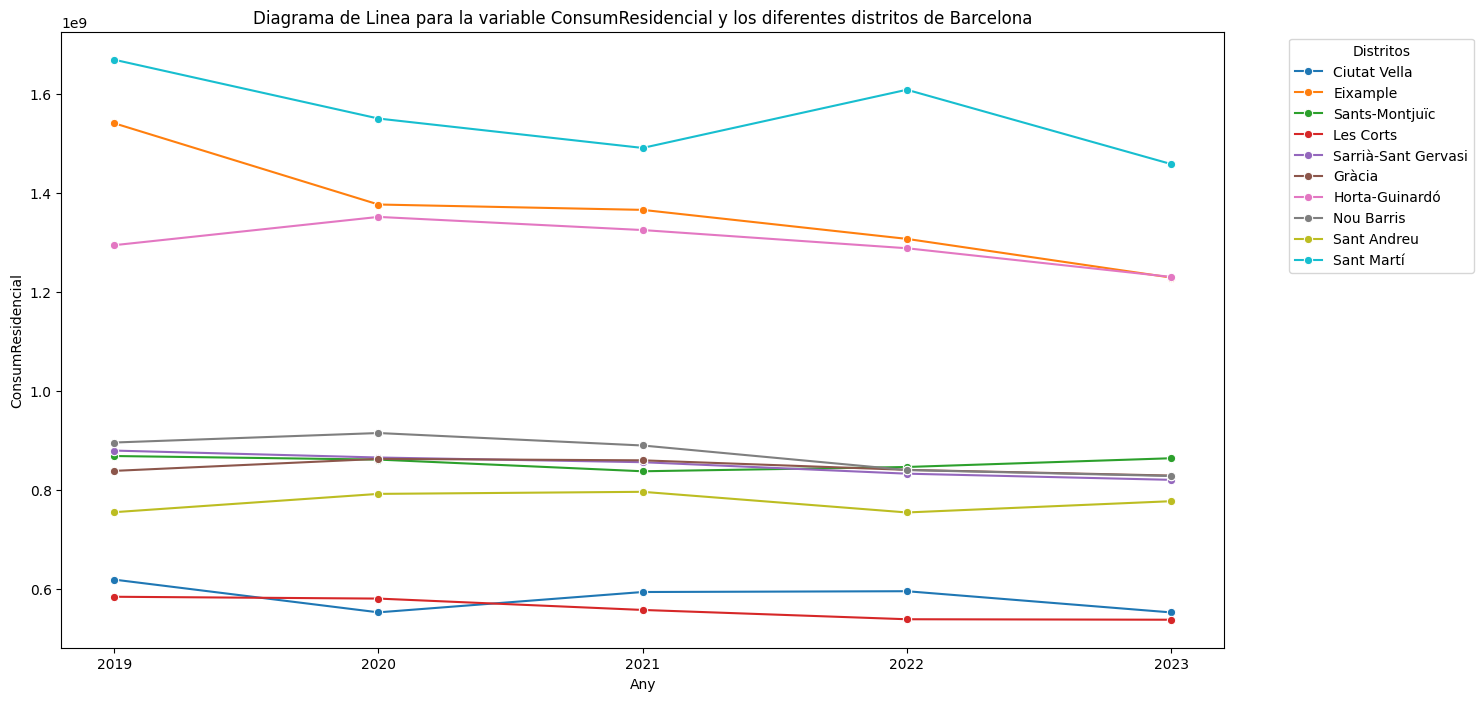

In [53]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))


sns.lineplot(data=df_ConResidencial, x='Any', y='ConsumResidencial', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable ConsumResidencial y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('ConsumResidencial')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_ConResidencial['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [54]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

In [55]:
# Mostrar información básica sobre el shapefile
barcelona_distritos.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [56]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [57]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_AgrupadoCom[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte       Nom_Districte
              1        Ciutat Vella
              2            Eixample
              3      Sants-Montjuïc
              4           Les Corts
              5 Sarrià-Sant Gervasi
              6              Gràcia
              7      Horta-Guinardó
              8          Nou Barris
              9         Sant Andreu
             10          Sant Martí


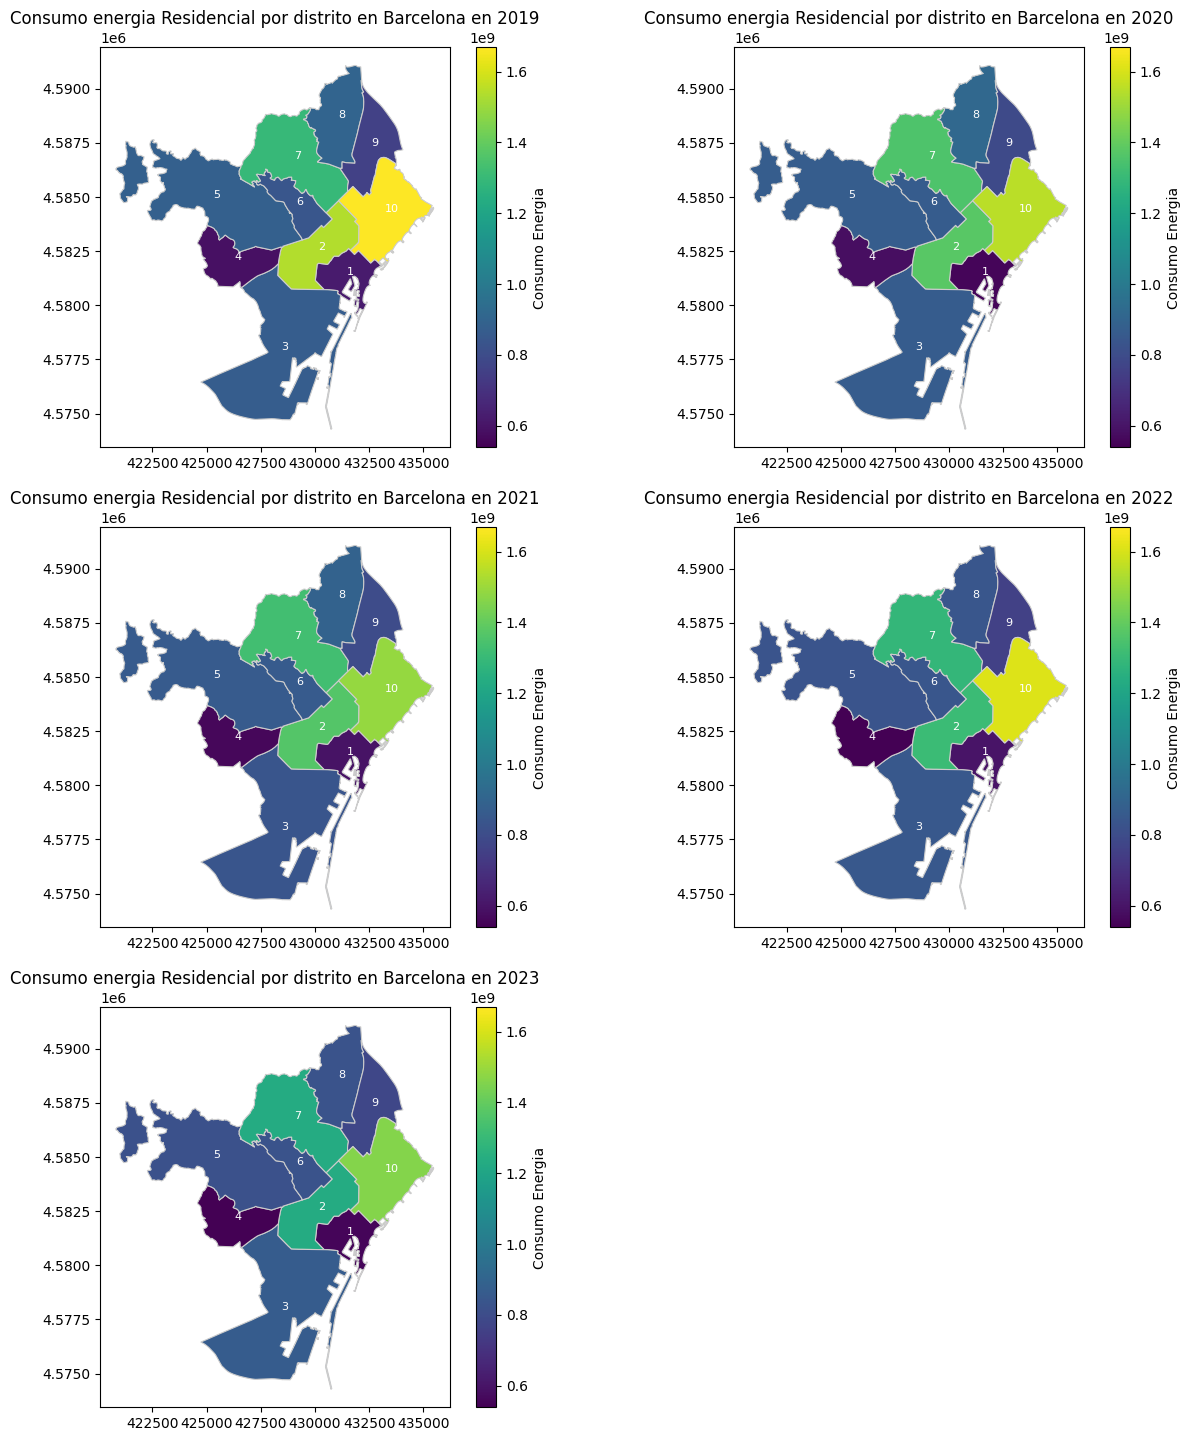

In [58]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_ConResidencial['ConsumResidencial'].max()
min_global = df_ConResidencial['ConsumResidencial'].min()

# Crear un colormap Viridis
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_ConResidencial['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_ConResidencial[df_ConResidencial['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8, color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Consumo energia Residencial por distrito en Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='ConsumResidencial', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8', norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Consumo Energia')  # Establece el nombre de la variable

